Recommendation system 
- Model-based collaborative filtering system based on customer's purchase history provided by other users who bought items similar items

# 1) Import Libraries

In [146]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

# 2) Reading Data

In [147]:
data = pd.read_csv('Online Sellers.csv', encoding= 'unicode_escape')

In [148]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [150]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 3) Data Cleaning

In [151]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Abnormal Values

In [152]:
data[data['Quantity']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [153]:
data[data['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,08-12-2011 14:06,0.0,NaN,United Kingdom


In [154]:
data=data.drop(data[data['Quantity']<=0].index)
data=data.drop(data[data['UnitPrice']<=0].index)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)

In [155]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Nulls

In [156]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [159]:
data.duplicated().sum()

5226

In [160]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)
data.shape

(524878, 8)

In [161]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [162]:
popular_products = pd.DataFrame(data.groupby('StockCode')['Quantity'].count())
most_popular = popular_products.sort_values('Quantity', ascending=False)
most_popular.head(10)

,Quantity
StockCode,
85123A,2253
85099B,2109
22423,2007
47566,1699
20725,1582
84879,1476
22197,1418
22720,1392
21212,1352


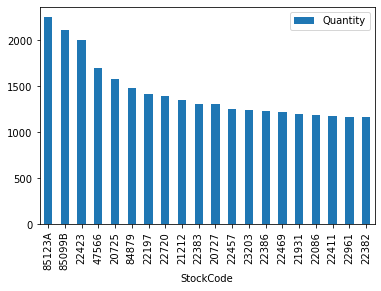

In [163]:
most_popular.head(20).plot(kind = "bar");

### Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.


# Model-based collaborative filtering system

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.
Collaborative filtering recommends the set of items based on what is called the user-item interaction matrix. 

In [164]:
customer_item_utility_matrix = data.pivot_table(values='Quantity', index='CustomerID', columns='StockCode', fill_value=0)
customer_item_utility_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00
12347.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,0.00
12348.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,2.25
12349.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,1.00
12350.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,1.00


In [165]:
customer_item_utility_matrix = customer_item_utility_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [166]:
X = customer_item_utility_matrix.T
X.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10123C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10124A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Decomposing the Matrix

In [171]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(3665, 10)

## Correlation Matrix

In [172]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(3665, 3665)

In [174]:
X.index[53]

'16169M'

In [175]:
i = "16169M"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

53

In [176]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(3665,)

In [179]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['10135',
 '11001',
 '15044D',
 '16010',
 '16011',
 '16014',
 '16156L',
 '16207B',
 '18097C']